# Installing Required Packages

In [1]:
# Installing H2O package
!pip install H2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 4.8 MB/s eta 0:00:00


In [2]:
#installing fancyimpute package
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.2 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=17575427b17b3ec5641a507b9125804b81fa505ce12833840025e789b94c631f
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=3e2a5b4da9a82f5b0398b4dce882a82a6e9be586e2f0c164c48f2cedafe56bbc
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


# Importing Required packages and train, test data.

In [3]:
# Importing necessary libraries and loading training data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# Loading training data from the provided URL
training_data = 'https://raw.githubusercontent.com/7PAM2015-0105-2023-Team-8/kaggle-challenge-Team-8/main/train.csv'
train_original = pd.read_csv(training_data)

# Displaying summary statistics of the training data
train_original.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train_original.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
# Loading and displaying the information about  test data
test_data = 'https://raw.githubusercontent.com/7PAM2015-0105-2023-Team-8/kaggle-challenge-Team-8/main/test.csv'
test_original = pd.read_csv(test_data)
test_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [7]:
test = test_original.copy()
train = train_original.copy()

In [8]:
# Dropping unnecessary columns from both training and test data
train.drop(['PassengerId','Name','Cabin'],axis=1, inplace=True)
test.drop(['PassengerId','Name','Cabin'],axis=1, inplace=True)

In [9]:
# Displaying the first few rows of the test data
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


# Explotatory Data Analysis

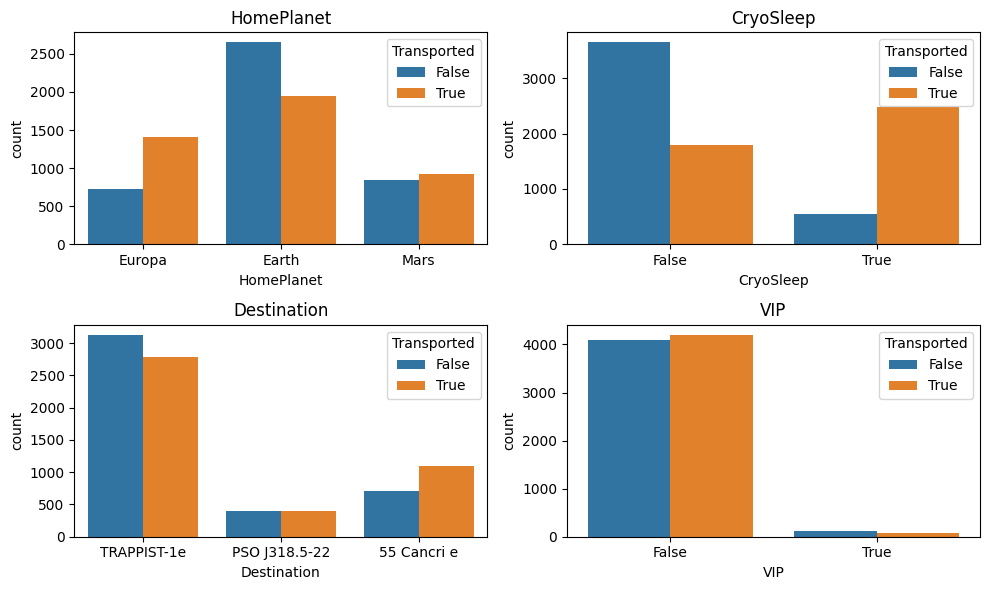

In [10]:
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig=plt.figure(figsize=(10,6))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(2,2,i+1)
    sns.countplot(data=train_original, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

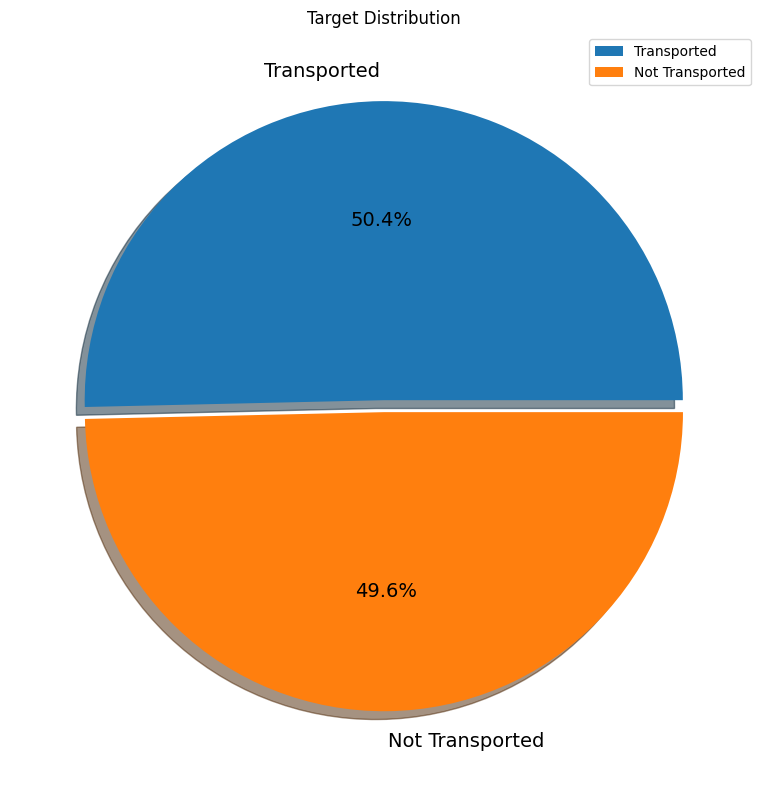

In [11]:
plt.figure(figsize=(8,8))
# Create a pie chart using the value counts of the 'Transported' column from the train dataframe
# Add percentage labels to each slice with one decimal place
plt.pie(train['Transported'].value_counts(),autopct='%1.1f%%',
        labels= ['Transported', 'Not Transported'], explode=[0.02,0.02],
        shadow=True, textprops={'fontsize' : 14})
plt.title('Target Distribution')
plt.legend()
plt.tight_layout()
plt.show()

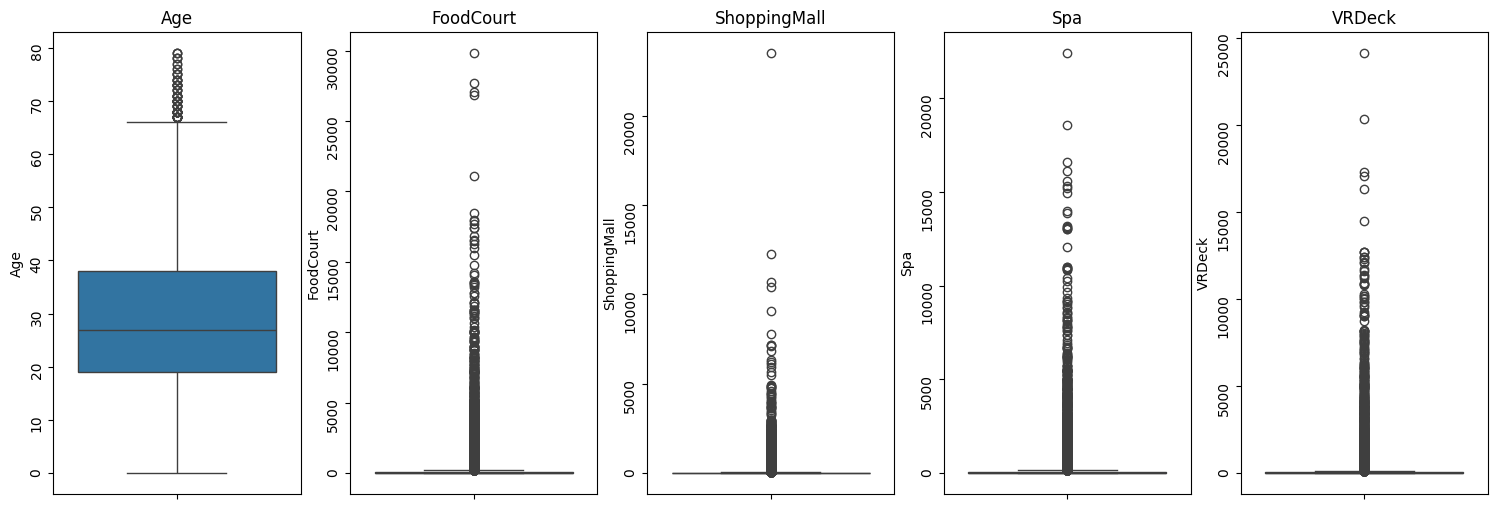

In [12]:
x= 0
cols = ['Age','FoodCourt','ShoppingMall','Spa','VRDeck']
plt.figure(figsize=(30,6))
for i in cols:
    x += 1
    plt.subplot(1, 8, x)
    sns.boxplot(data=train[i])
    plt.yticks(rotation=90)
    plt.title(i)
plt.show()

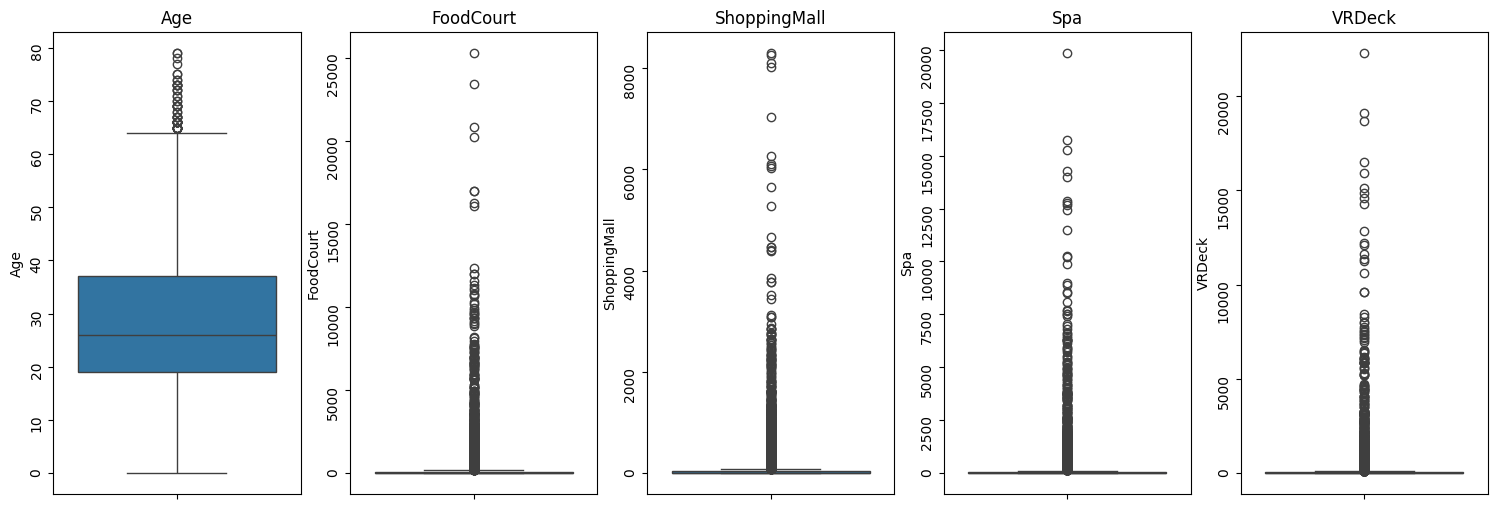

In [13]:
x= 0
cols = ['Age','FoodCourt','ShoppingMall','Spa','VRDeck']
plt.figure(figsize=(30,6))
for i in cols:
    x += 1
    plt.subplot(1, 8, x)
    sns.boxplot(data=test[i])
    plt.yticks(rotation=90)
    plt.title(i)
plt.show()

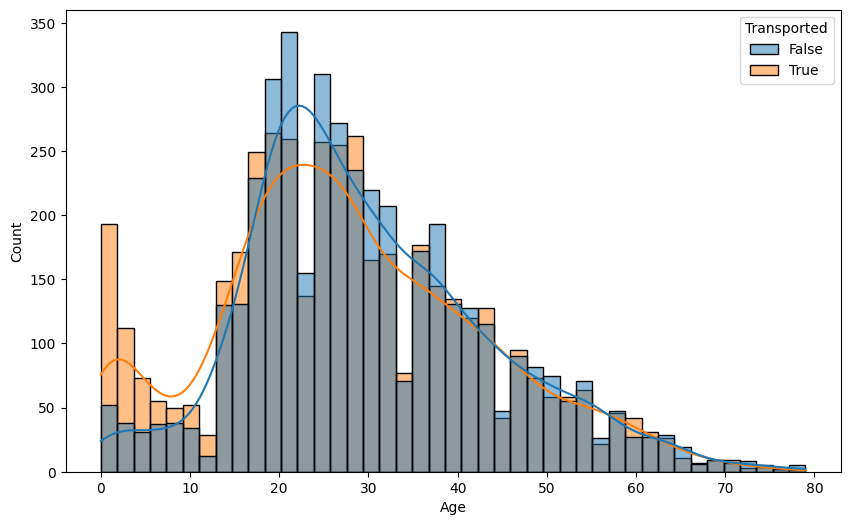

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(data=train, x="Age", hue = "Transported", kde = True)
plt.show()

<Axes: xlabel='VRDeck', ylabel='Count'>

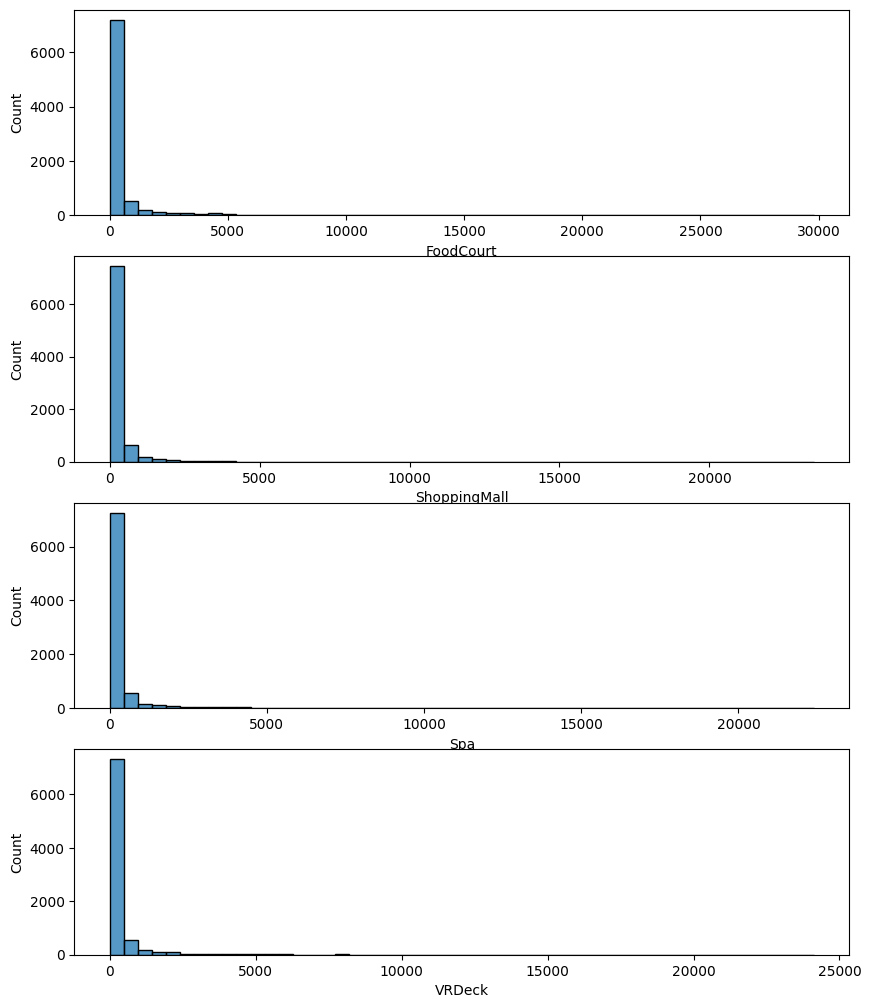

In [15]:
# Visualizing distributions of selected features using seaborn
fig, ax = plt.subplots(4,1,  figsize=(10, 5))
plt.subplots_adjust(top = 2)
sns.histplot(train['FoodCourt'], color=None, bins=50, ax=ax[0])
sns.histplot(train['ShoppingMall'], color=None, bins=50, ax=ax[1])
sns.histplot(train['Spa'], color=None, bins=50, ax=ax[2])
sns.histplot(train['VRDeck'], color=None, bins=50, ax=ax[3])

# Missing Values

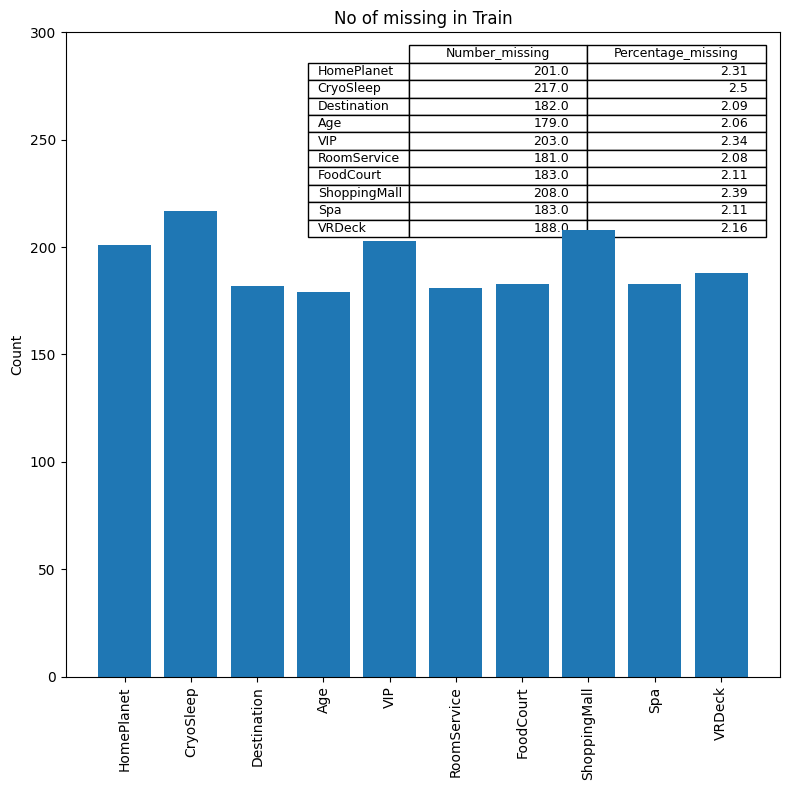

In [16]:
na_cols=train.columns[train.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(train[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(train),2)
plt.figure(figsize=(8,8))
plt.table(cellText=mv.values, colLabels=mv.columns, loc='upper right',
          rowLabels=mv.index, colWidths=[0.25] * 3)
plt.bar(mv.index, mv['Number_missing'])
plt.yticks([0,50,100,150,200,250,300])
plt.grid(visible=True,which='minor')
plt.title('No of missing in Train')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.tight_layout()
plt.show()

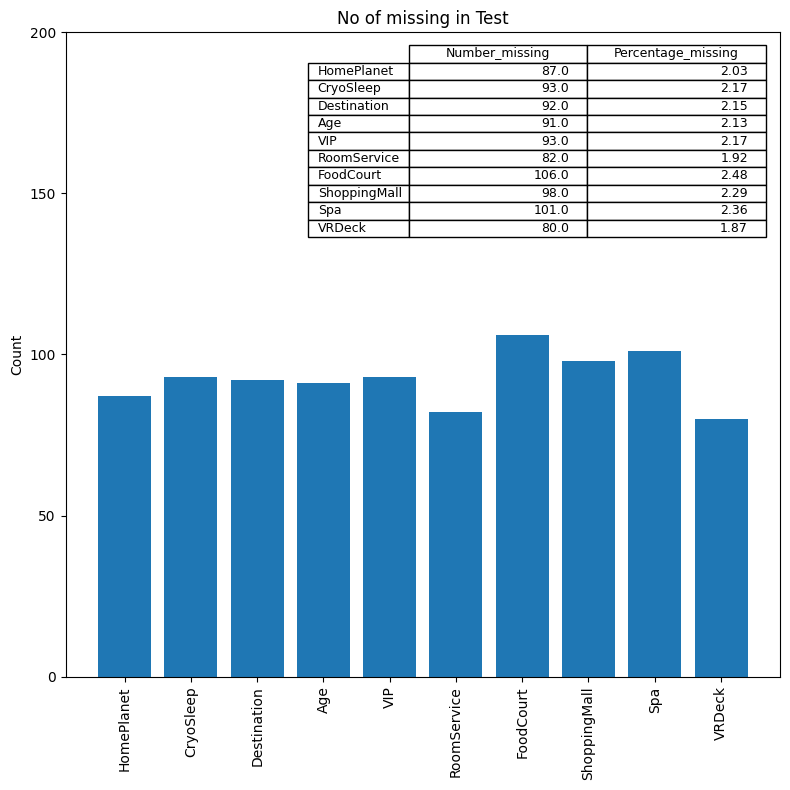

In [17]:
na_cols=test.columns[test.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(test[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(test),2)
plt.figure(figsize=(8,8))
plt.table(cellText=mv.values, colLabels=mv.columns, loc='upper right',
          rowLabels=mv.index, colWidths=[0.25] * 3)
plt.bar(mv.index, mv['Number_missing'])
plt.yticks([0,50,100,150,200])
plt.grid(visible=True,which='minor')
plt.title('No of missing in Test')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.tight_layout()
plt.show()

# Data Preparation

In [18]:
# Adding categorical characteristics to test and training data
def encode_categorical_features(train, test):
    encoder = LabelEncoder()
    for dataset in [train, test]:
        for column in dataset.select_dtypes(include=['object']).columns:
            dataset[column] = encoder.fit_transform(dataset[column])
    return train, test
train, test = encode_categorical_features(train, test)
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True


In [19]:
#  Imputing missing values in both training and test data using IterativeImputer
from fancyimpute import IterativeImputer
mice_imputer = IterativeImputer()
X_imputed = mice_imputer.fit_transform(train)
Y_imputed = mice_imputer.fit_transform(test)
train_imputed  = pd.DataFrame(X_imputed)
test_imputed = pd.DataFrame(Y_imputed)
train_imputed.columns = train.columns
test_imputed.columns = test.columns
train_imputed.head()


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1.0,0.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0
2,1.0,0.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0
3,1.0,0.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0
4,0.0,0.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0


In [20]:
# Displaying the first few rows of the imputed test data
test_imputed.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0
2,1.0,1.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,2.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0
4,0.0,0.0,2.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0


In [21]:
# Displaying information about the imputed test data
test_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   float64
 1   CryoSleep     4277 non-null   float64
 2   Destination   4277 non-null   float64
 3   Age           4277 non-null   float64
 4   VIP           4277 non-null   float64
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
dtypes: float64(10)
memory usage: 334.3 KB


In [22]:
train_imputed['Age'].describe()

count    8693.000000
mean       28.827470
std        14.346227
min         0.000000
25%        20.000000
50%        27.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

In [23]:
train_imputed['FoodCourt'].describe()

count     8693.000000
mean       457.936606
std       1596.065835
min      -1041.177678
25%          0.000000
50%          0.000000
75%        104.000000
max      29813.000000
Name: FoodCourt, dtype: float64

In [24]:
train_imputed['ShoppingMall'].describe()

count     8693.000000
mean       173.746457
std        597.441364
min          0.000000
25%          0.000000
50%          0.000000
75%         45.000000
max      23492.000000
Name: ShoppingMall, dtype: float64

In [25]:
train_imputed['Spa'].describe()


count     8693.000000
mean       310.613831
std       1125.777757
min       -347.858497
25%          0.000000
50%          0.000000
75%         74.000000
max      22408.000000
Name: Spa, dtype: float64

In [26]:
train_imputed['VRDeck'].describe()

count     8693.000000
mean       303.897987
std       1134.396691
min       -450.033435
25%          0.000000
50%          0.000000
75%         59.000000
max      24133.000000
Name: VRDeck, dtype: float64

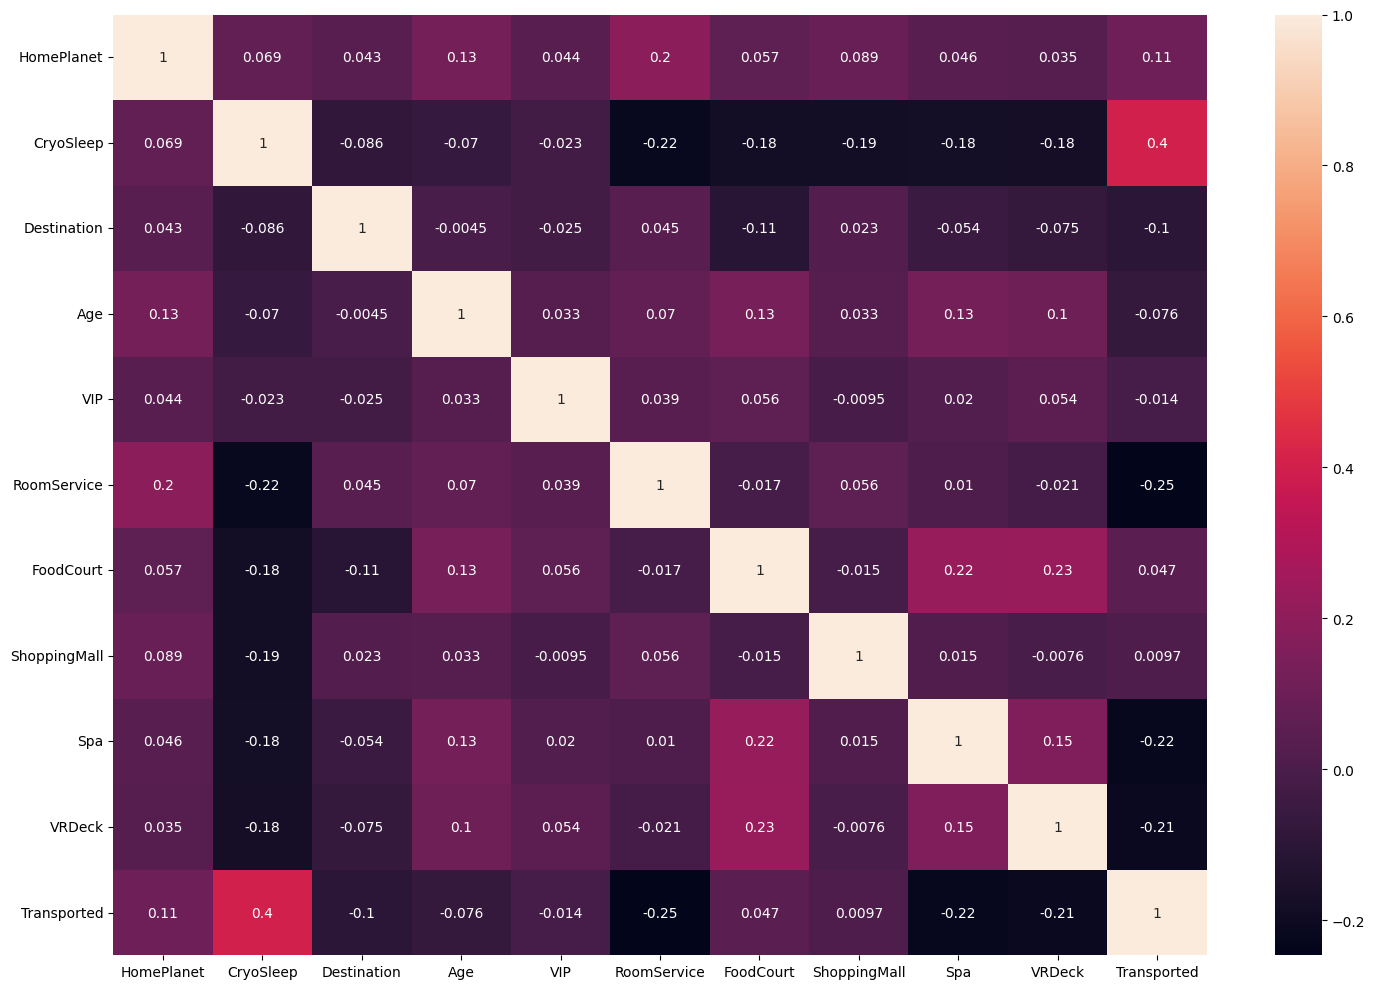

In [27]:
# Visualizing correlation matrix using a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(train_imputed.corr(), annot=True)
plt.tight_layout()
plt.show()

In [28]:
# Standardizing numerical features in both training and test data
def standardize_numerical_features(train, test):
    scaler = StandardScaler()
    numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    train[numerical_columns] = scaler.fit_transform(train[numerical_columns])
    test[numerical_columns] = scaler.transform(test[numerical_columns])
    return train, test

train_data, test_data = standardize_numerical_features(train_imputed, test_imputed)

# Modelling

In [29]:
# Importing necessary modules from H2O
import h2o
from h2o.automl import H2OAutoML

In [30]:
# Initializing H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpbr_qqeo4
  JVM stdout: /tmp/tmpbr_qqeo4/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpbr_qqeo4/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,"7 days, 15 hours and 39 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_rkfx0n
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [31]:
# Create a dictionary to map boolean values to labels
boolean_to_label = {0: "Not transported", 1: "Transported"}

#Mapping boolean values in the target column to labels and converting data to H2OFrame
train_data['Transported'] = train_data['Transported'].map(boolean_to_label)

train_h2o = h2o.H2OFrame(train_data)
test_h2o = h2o.H2OFrame(test_data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [32]:
# Displaying summary statistics of the test data in H2OFrame
test_h2o.describe()

Rows:4277
Cols:10

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
type,int,int,int,real,int,real,real,real,real,real
mins,0.0,0.0,0.0,-2.0095269275641776,0.0,-0.9949640919714802,-0.2869323667028233,-0.29083431694665723,-0.27592630657299133,-0.26790933906249703
mean,0.727846621463642,0.4044891278933835,1.537526303483752,-0.01119002225155882,0.06079027355623102,-0.008591896389538884,-0.011097021290121297,0.006380027198989279,-0.007101708915625324,0.005720676968141857
maxs,3.0,2.0,3.0,3.497464315518205,2.0,17.165858950904223,15.54853833158101,13.589150356462737,17.352012561936817,19.3665636084881
sigma,0.8676729126222249,0.5333222314945057,0.8276708656271314,0.9783534312415662,0.3171856954622039,0.9106306015281522,0.947003693553648,0.9280784157100787,0.9809628367153861,1.0894600736457323
zeros,2263,2640,841,0,4110,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0
0,0.0,1.0,2.0,-0.1273906799284267,0.0,-0.3401231173769489,-0.2869323667028233,-0.29083431694665723,-0.27592630657299133,-0.26790933906249703
1,0.0,0.0,2.0,-0.6850606792279085,0.0,-0.3401231173769489,-0.2812931772008032,-0.29083431694665723,2.2318176677166273,-0.26790933906249703
2,1.0,1.0,0.0,0.1514443197213142,0.0,-0.3401231173769489,-0.2869323667028233,-0.29083431694665723,-0.27592630657299133,-0.26790933906249703


In [33]:
x = train_h2o.columns[:-1]  # Assuming the last column is the target
y = train_h2o.columns[-1]


In [34]:
# Split data into training and validation sets
train_h2o, valid_h2o = train_h2o.split_frame(ratios=[0.9], seed=124)

In [36]:
aml = H2OAutoML(max_runtime_secs=120,max_models=20, include_algos = ['DRF', 'XGBoost', 'GBM'])  # Adjust max runtime as needed
# Train AutoML model using features 'x' and target variable 'y' with provided training and validation data frames
aml.train(x=x, y=y, training_frame=train_h2o, validation_frame=valid_h2o)

AutoML progress: |
07:08:11.70: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_5_AutoML_1_20240321_70811


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    52                 52                          38194                  6            6            6             33            63            53.7885

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.11165461211713716
RMSE: 0.3341475903207102
LogLoss: 0.35703952440014614
Mean Per-Class Error: 0.1596209166360031
AUC: 0.9262418905106505
AUCPR: 0.9290679248617955
Gini: 0.8524837810213011

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4556557595392163
                 Not transported    Transported    Error    Rate
---------------  -----------------  -------------  -------  ---------------
Not transported  3022               853            0.2201   (853.0/3875.0)
Transported      391                3554           0.0991   (391.0/3945.0)
Total            3413               4407           0.1591   (1244.0/7820.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.455656     0.851054  204
max f2                       0.181283     0.902804  297
max f0point5                 0.659321     0.857469  125
max accuracy                 0.507642     0.842327  187
max precision                0.979191     1         0
max recall                   0.0817843    1         361
max specificity              0.979191     1         0
max absolute_mcc             0.497021     0.68686   191
max min_per_class_accuracy   0.582337     0.837769  160
max mean_per_class_accuracy  0.507642     0.841977  187
max tns                      0.979191     3875      0
max fns                      0.979191     3943      0
max fps                      0.00871032   3875      399
max tps                      0.0817843    3945      361
max tnr                      0.979191     1         0
max fnr                      0.979191     0.999493  0
max fpr                      0.00871032   1         399
max tpr                      0.0817843    1         361

Gains/Lift Table: Avg response rate: 50.45 %, avg score: 50.42 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0134271                   0.972423           1.98226    1.98226            1                0.973516  1                           0.973516            0.026616        0.026616                   98.2256   98.2256            0.026616
2        0.0241688                   0.971843           1.98226    1.98226            1                0.971928  1                           0.97281             0.0212928       0.0479087                  98.2256   98.2256            0.0479087
3        0.0300512                   0.971219           1.98226    1.98226            1                0.971414  1                           0.972537            0.0116603       0.0595691                  98.2256   98.2256            0.0595691
4        0.0446292                   0.970909           1.96487    1.97658            0.991228         0.970955  0.997135                    0.97202             0.0286439       0.0882129                  96.4868   97.6576       

In [37]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_5_AutoML_1_20240321_70811,0.890449,0.413372,0.899774,0.190211,0.364269,0.132692,729,0.019258,GBM
GBM_2_AutoML_1_20240321_70811,0.888894,0.415513,0.898927,0.196507,0.365667,0.133713,1489,0.014305,GBM
GBM_3_AutoML_1_20240321_70811,0.888768,0.415726,0.898506,0.193531,0.366048,0.133991,769,0.012265,GBM
GBM_4_AutoML_1_20240321_70811,0.887425,0.418333,0.897712,0.193944,0.367488,0.135047,1375,0.015476,GBM
XGBoost_3_AutoML_1_20240321_70811,0.886966,0.41864,0.89624,0.194397,0.367343,0.134941,389,0.005385,XGBoost
GBM_1_AutoML_1_20240321_70811,0.886261,0.420054,0.894662,0.195433,0.367591,0.135123,1677,0.022677,GBM
XRT_1_AutoML_1_20240321_70811,0.884046,0.430693,0.892886,0.195582,0.369988,0.136891,1774,0.031351,DRF
XGBoost_grid_1_AutoML_1_20240321_70811_model_5,0.884044,0.424164,0.892878,0.19557,0.369548,0.136566,802,0.005491,XGBoost
DRF_1_AutoML_1_20240321_70811,0.883476,0.433747,0.893199,0.199796,0.370473,0.13725,2179,0.033403,DRF
XGBoost_grid_1_AutoML_1_20240321_70811_model_6,0.882473,0.427343,0.891213,0.199442,0.370786,0.137482,583,0.004922,XGBoost


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_5_AutoML_1_20240321_70811

,Not transported,Transported,Error,Rate
Not transported,3016.0,859.0,0.2217,(859.0/3875.0)
Transported,386.0,3559.0,0.0978,(386.0/3945.0)
Total,3402.0,4418.0,0.1592,(1245.0/7820.0)


# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

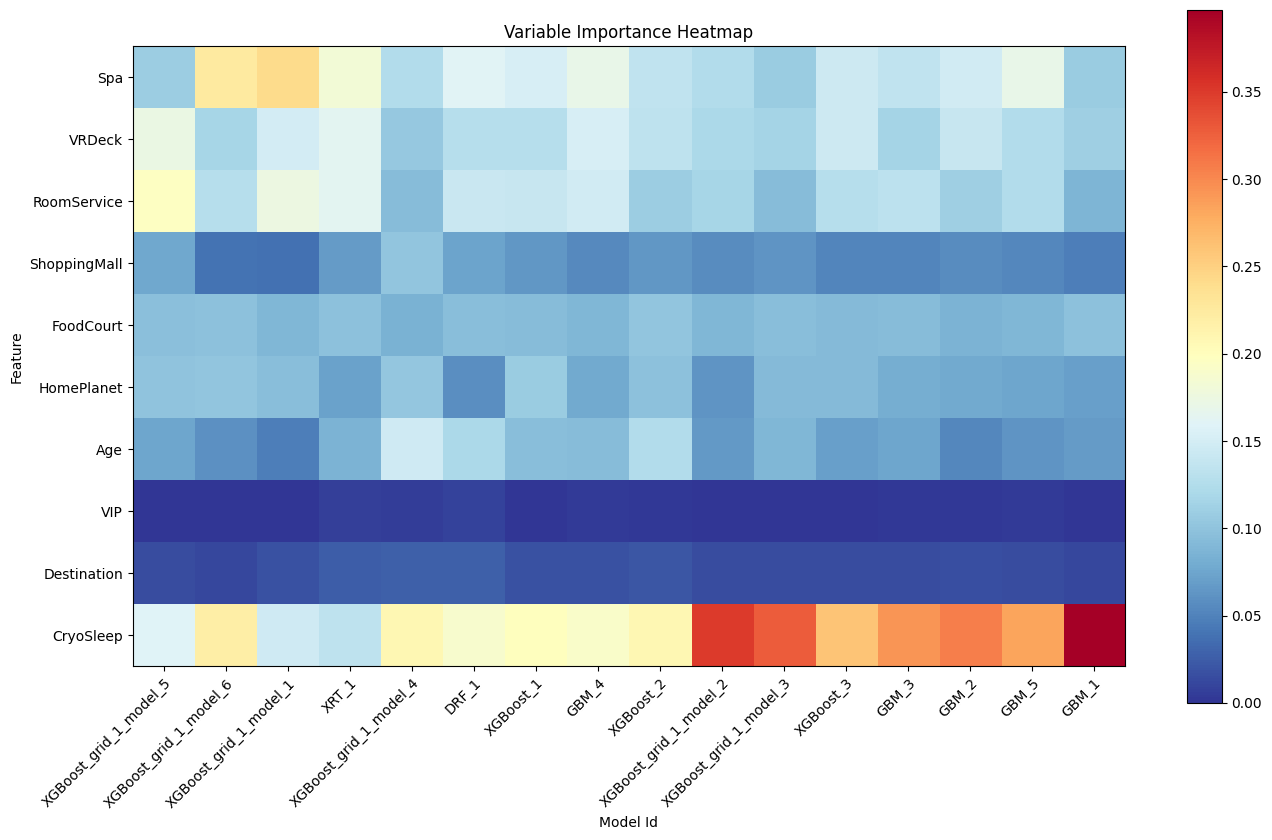

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

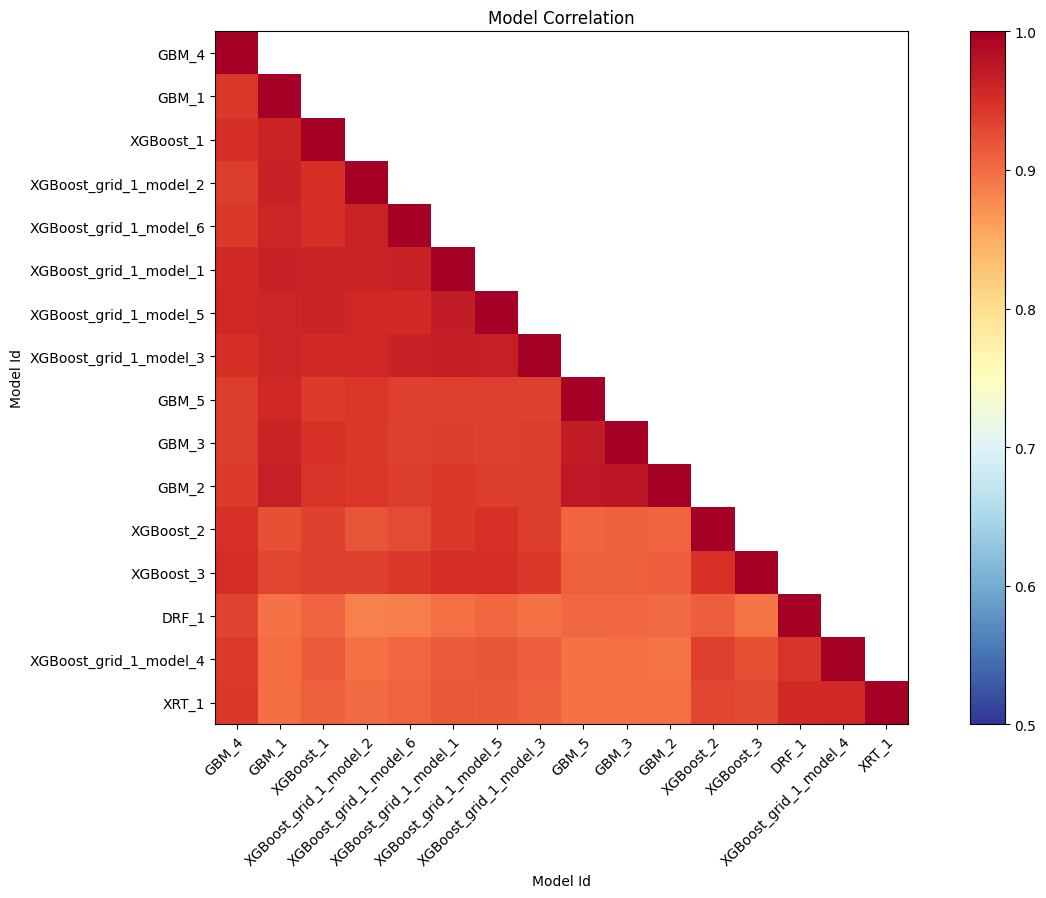

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

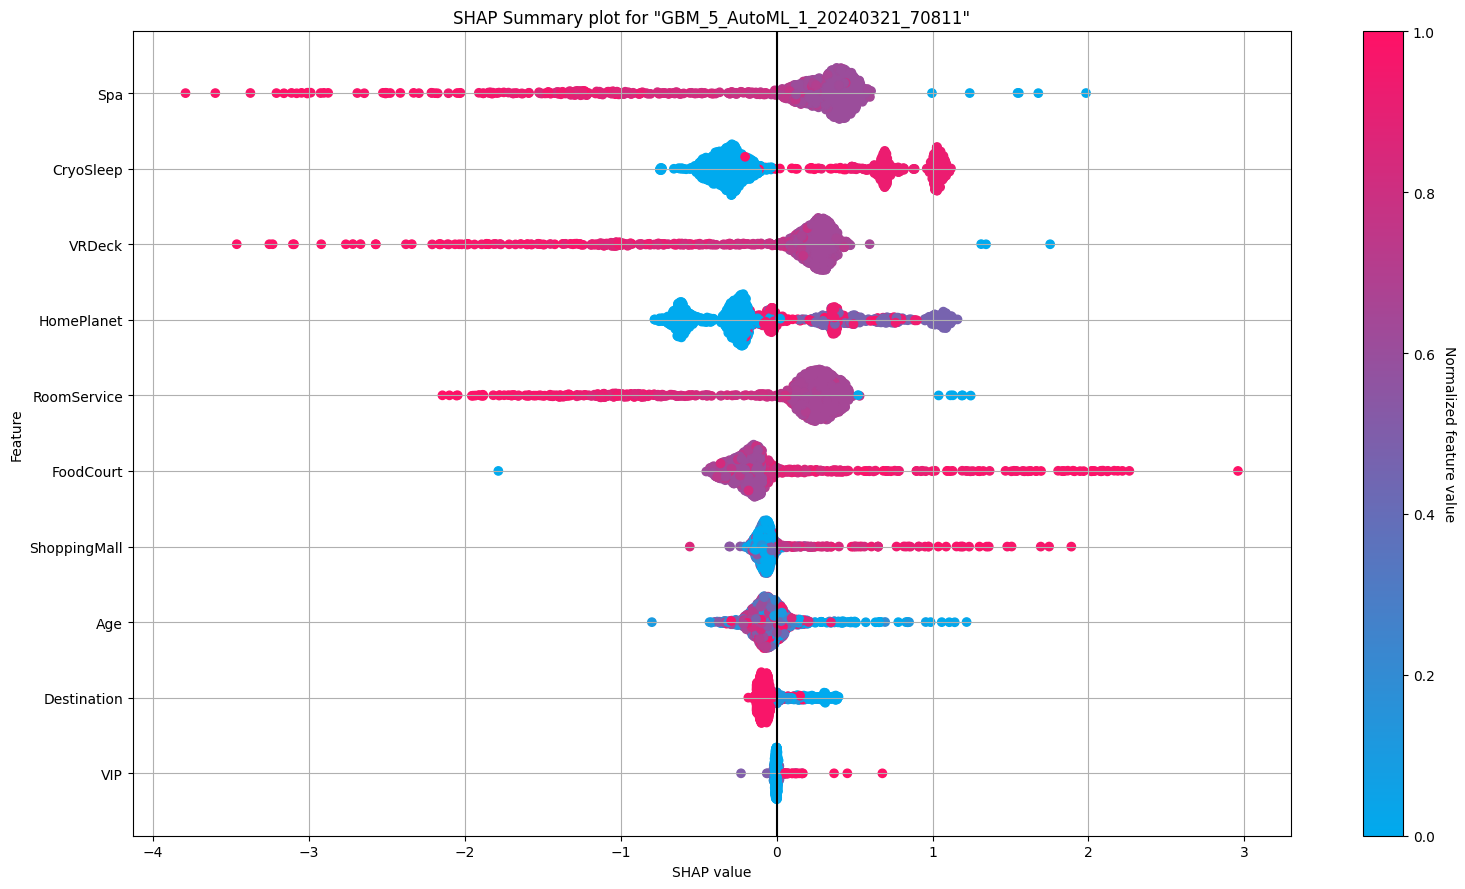

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

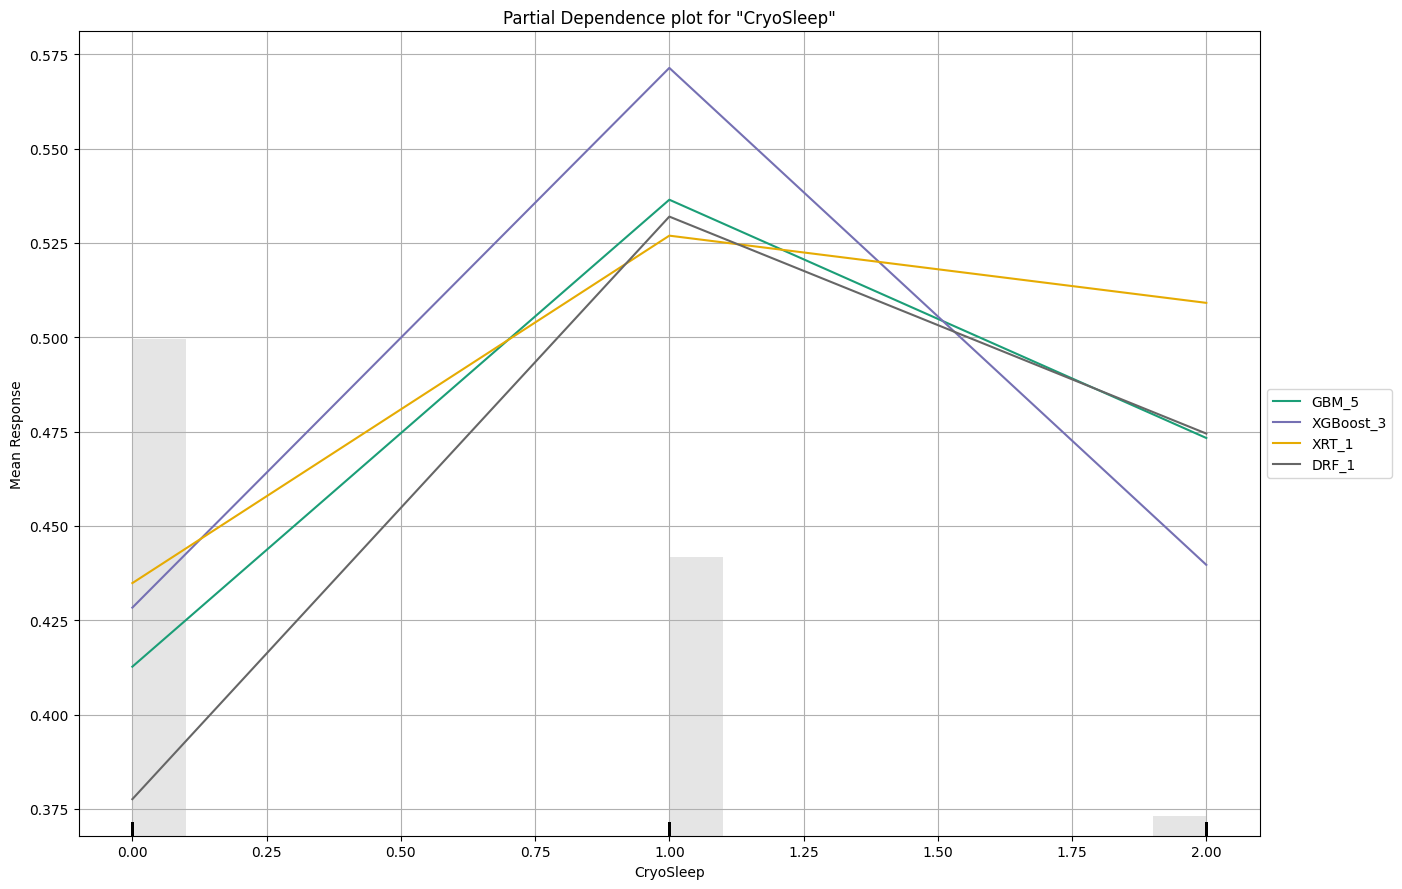

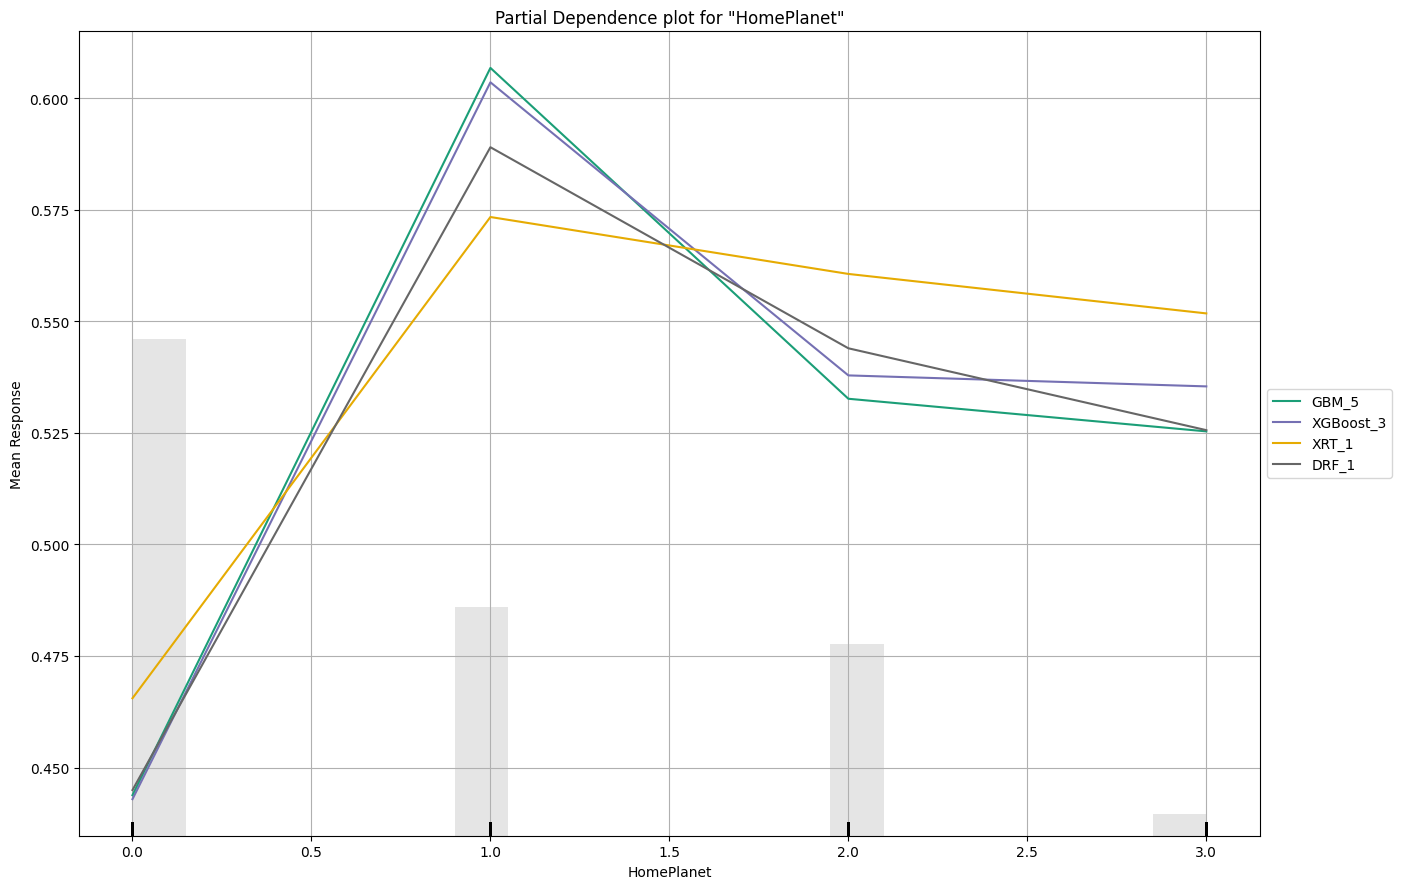

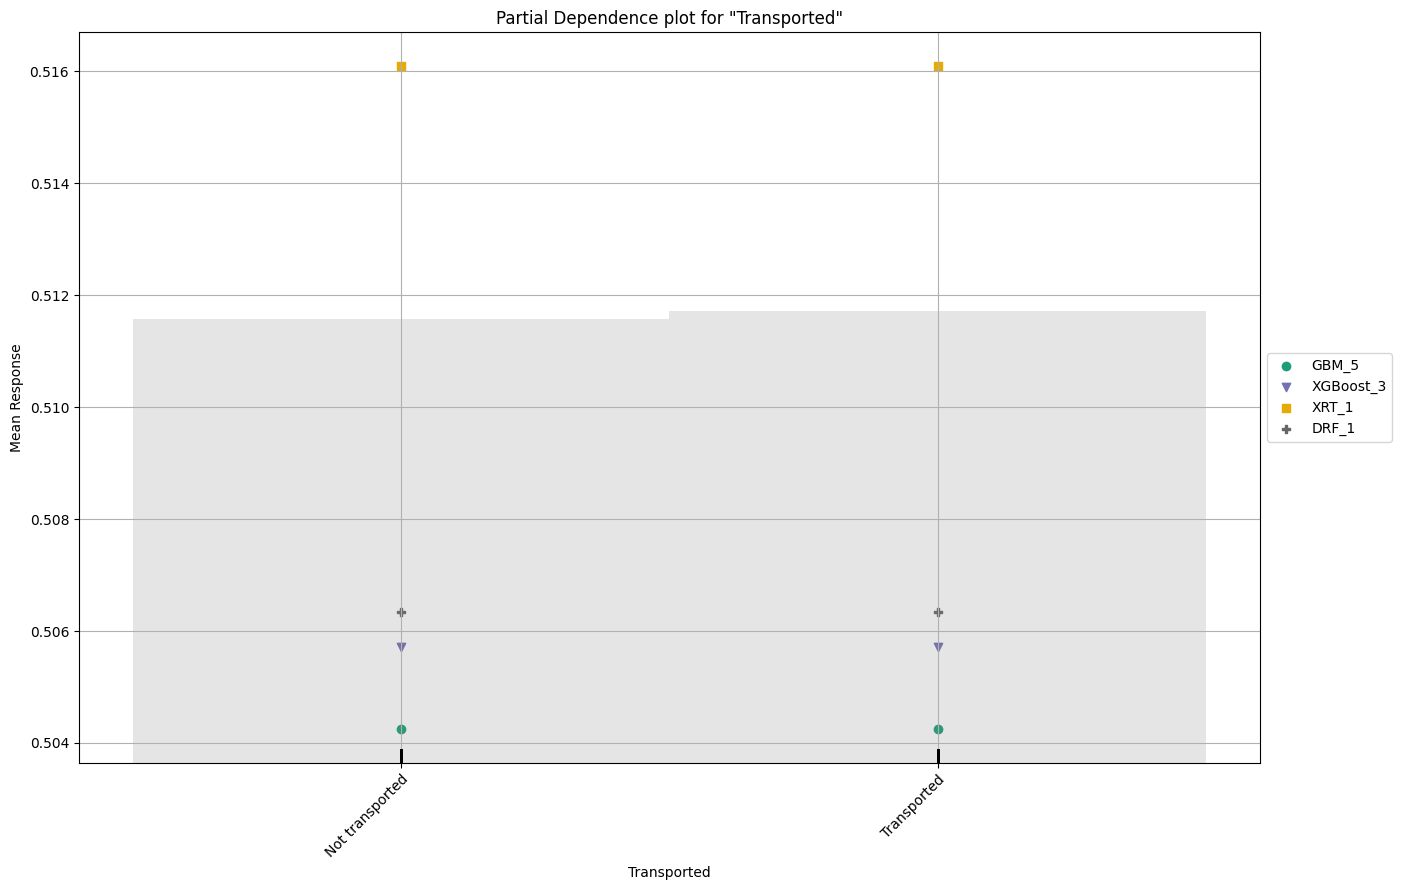

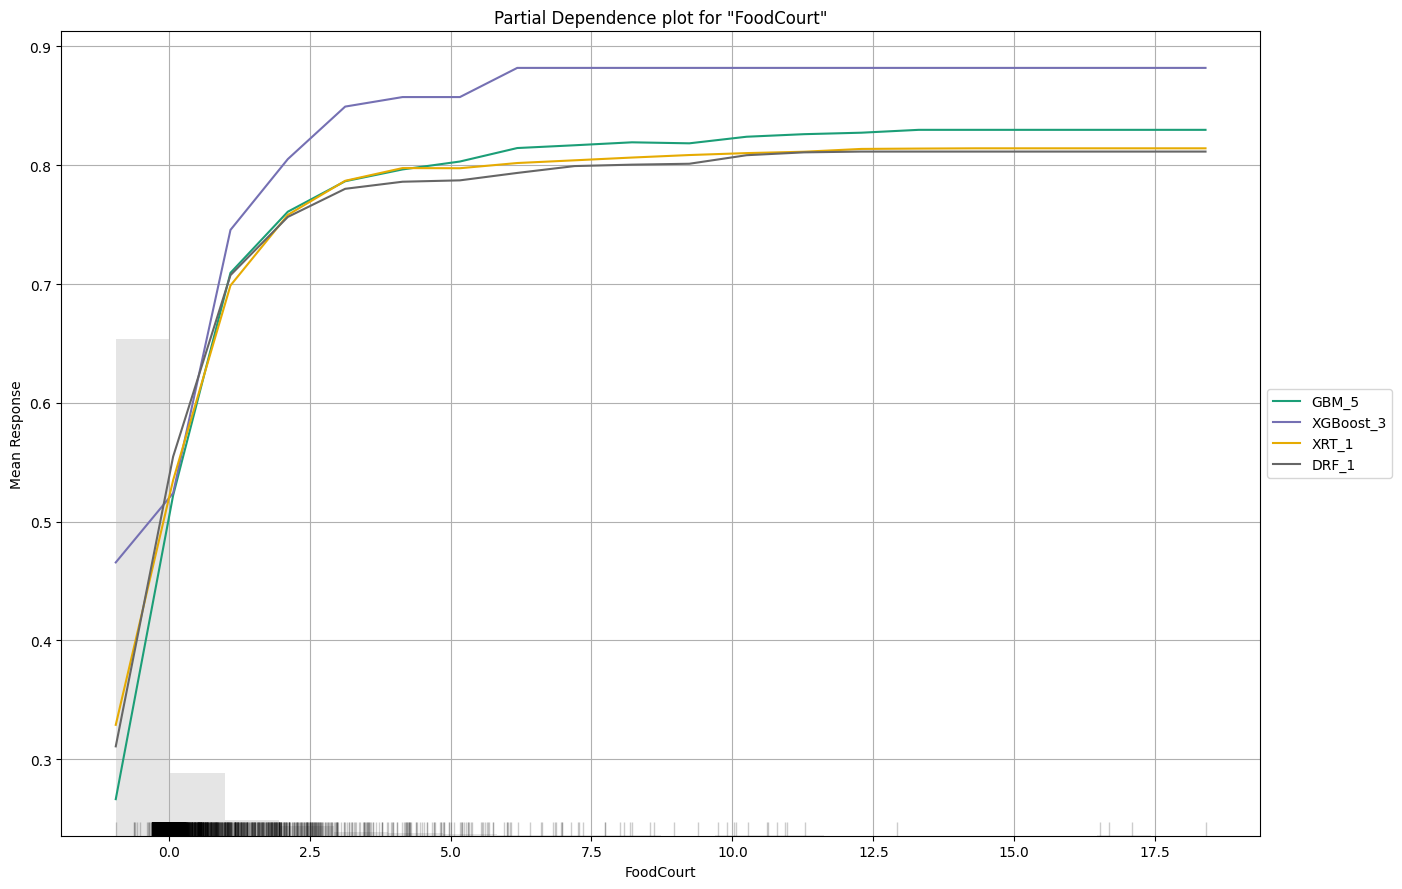

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_5_AutoML_1_20240321_70811

,Not transported,Transported,Error,Rate
Not transported,3016.0,859.0,0.2217,(859.0/3875.0)
Transported,386.0,3559.0,0.0978,(386.0/3945.0)
Total,3402.0,4418.0,0.1592,(1245.0/7820.0)


# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

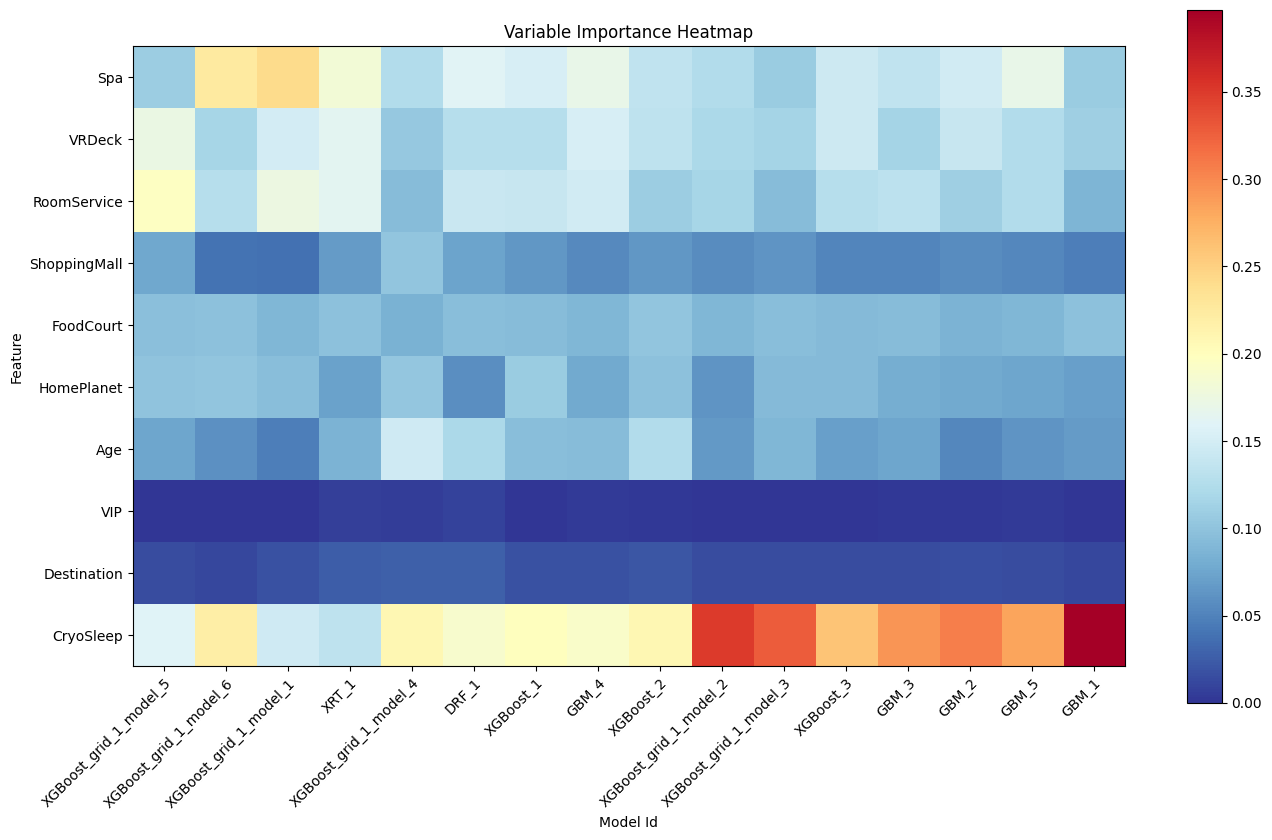

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

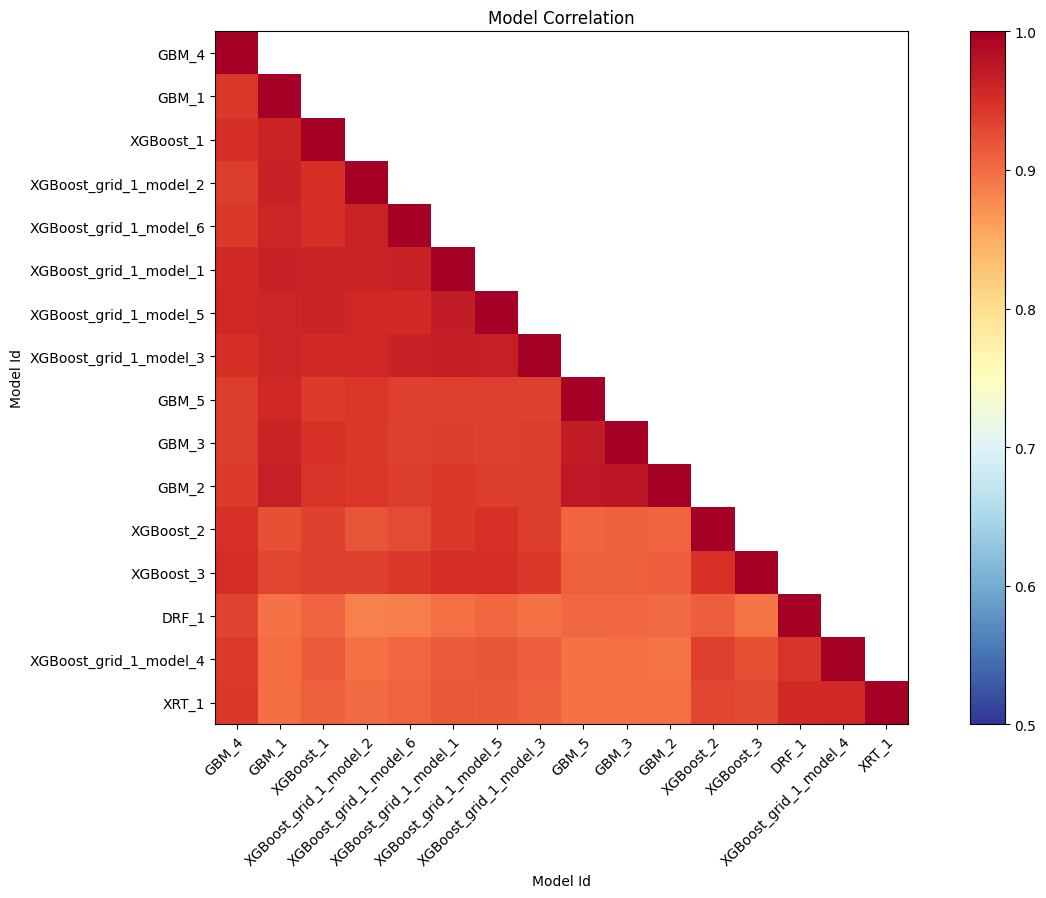

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

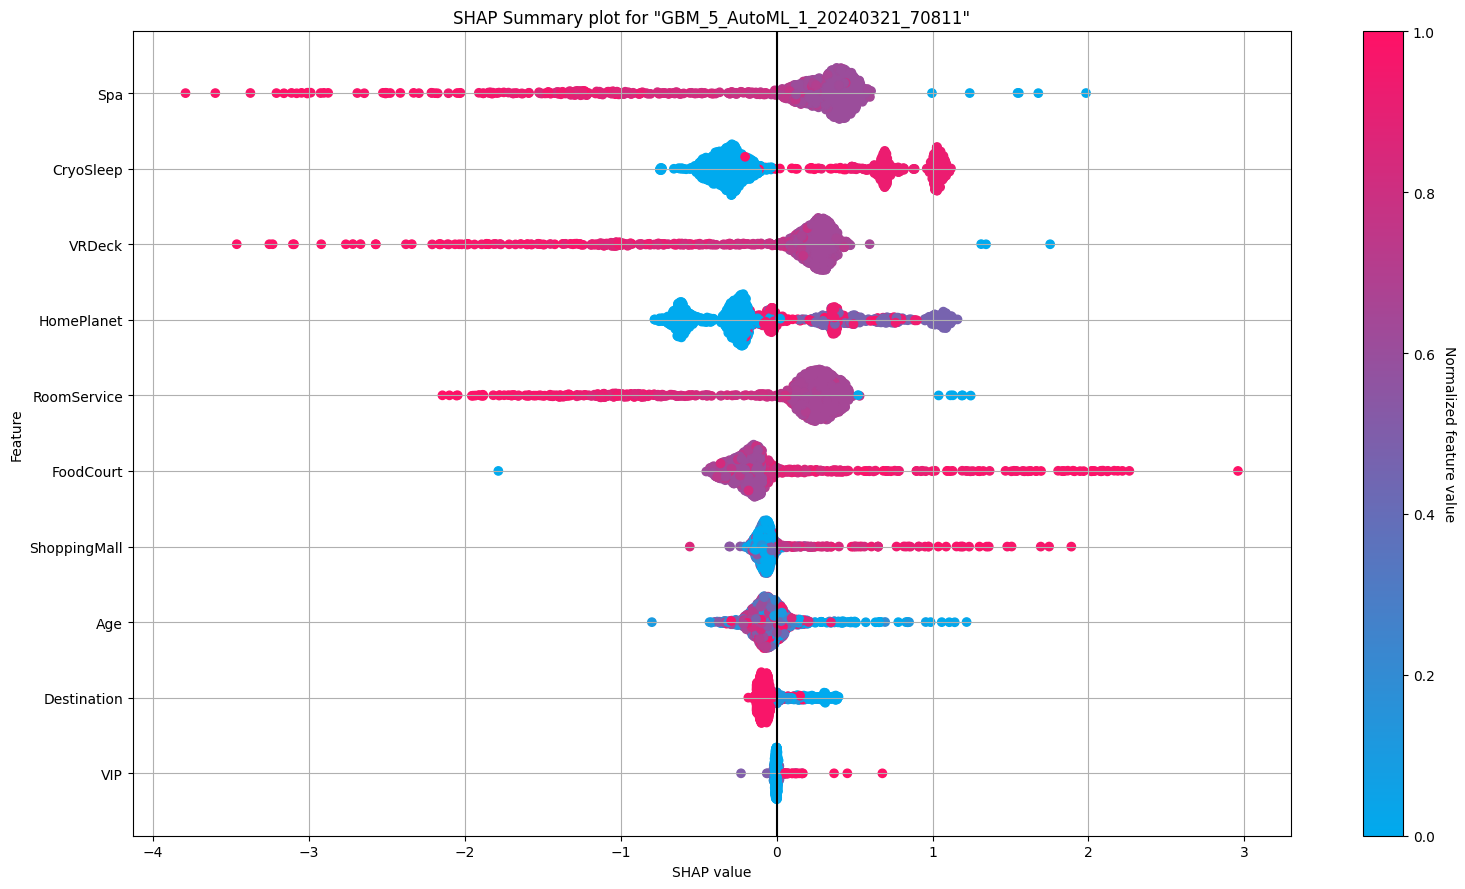

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

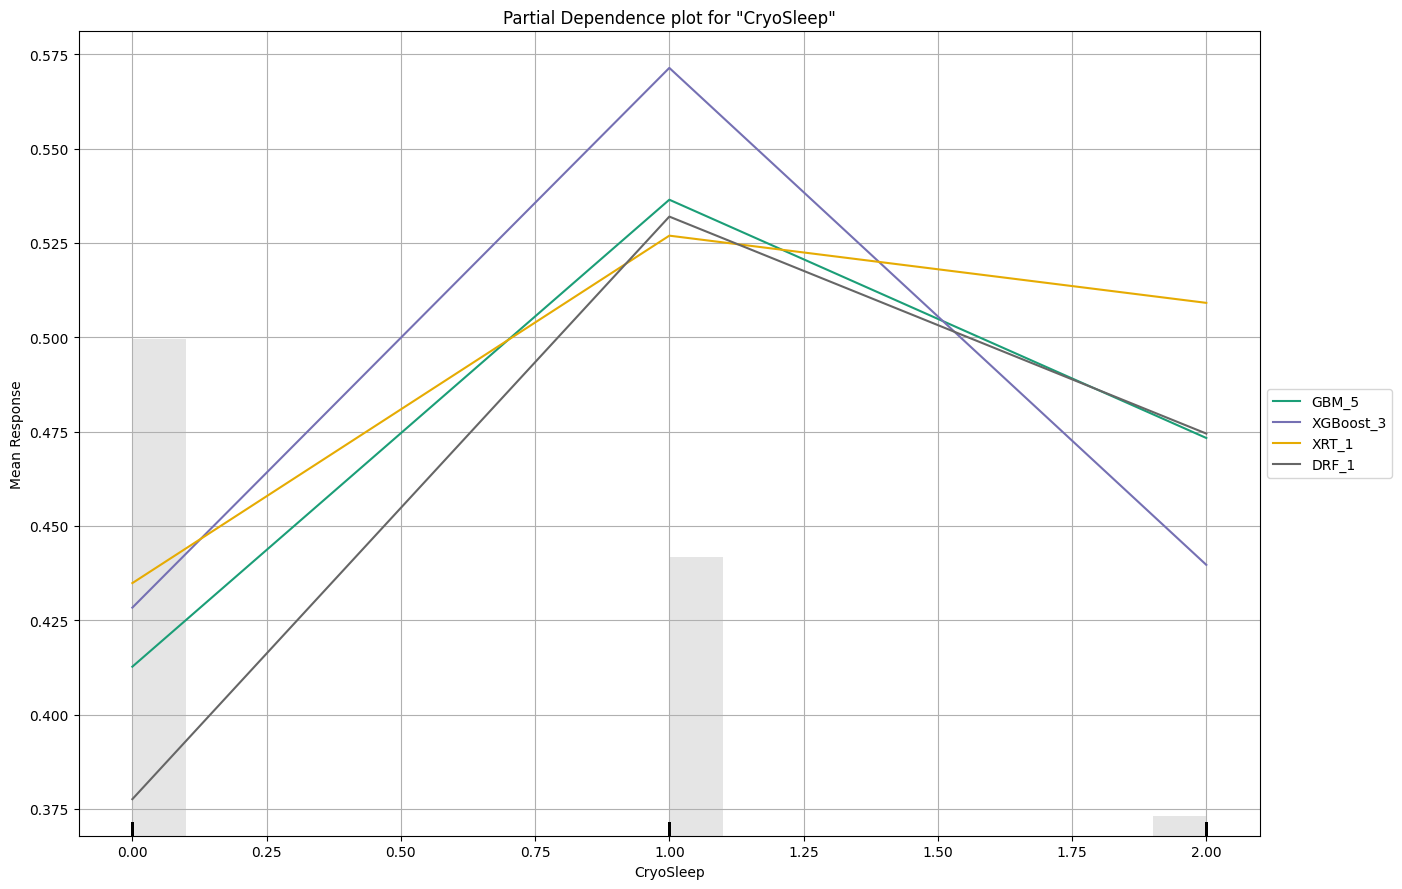

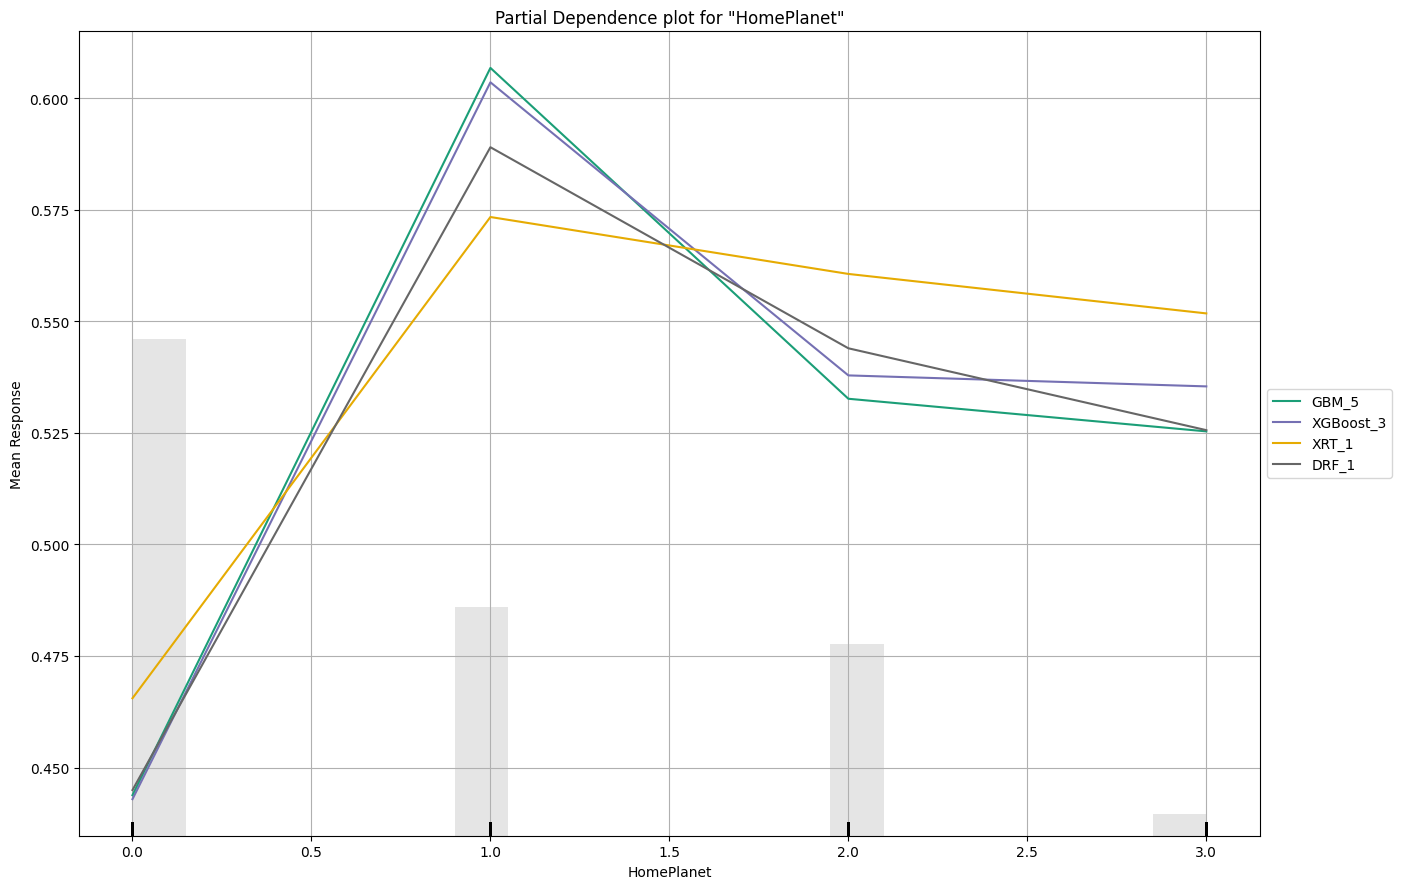

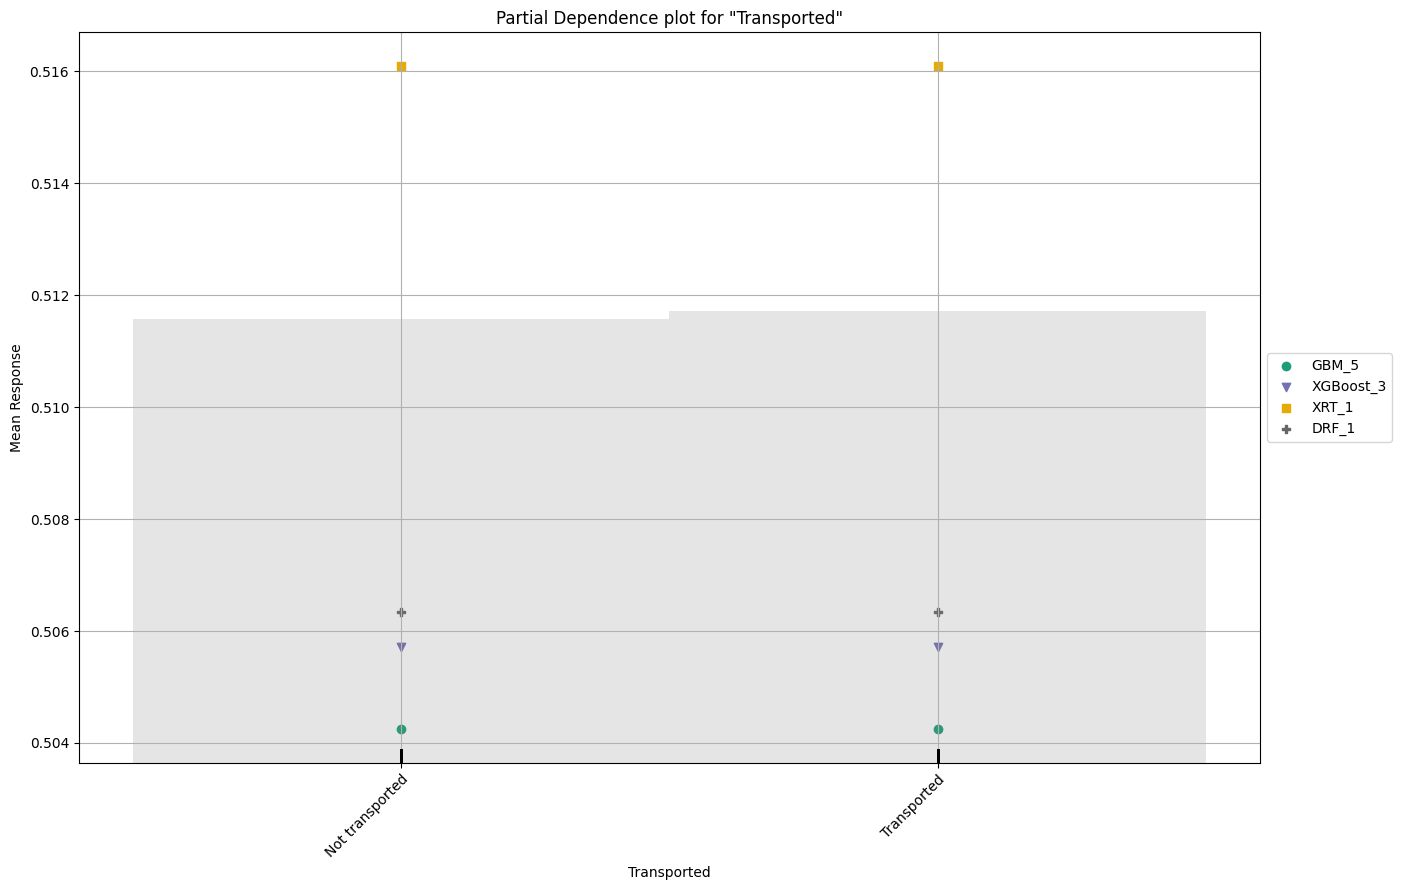

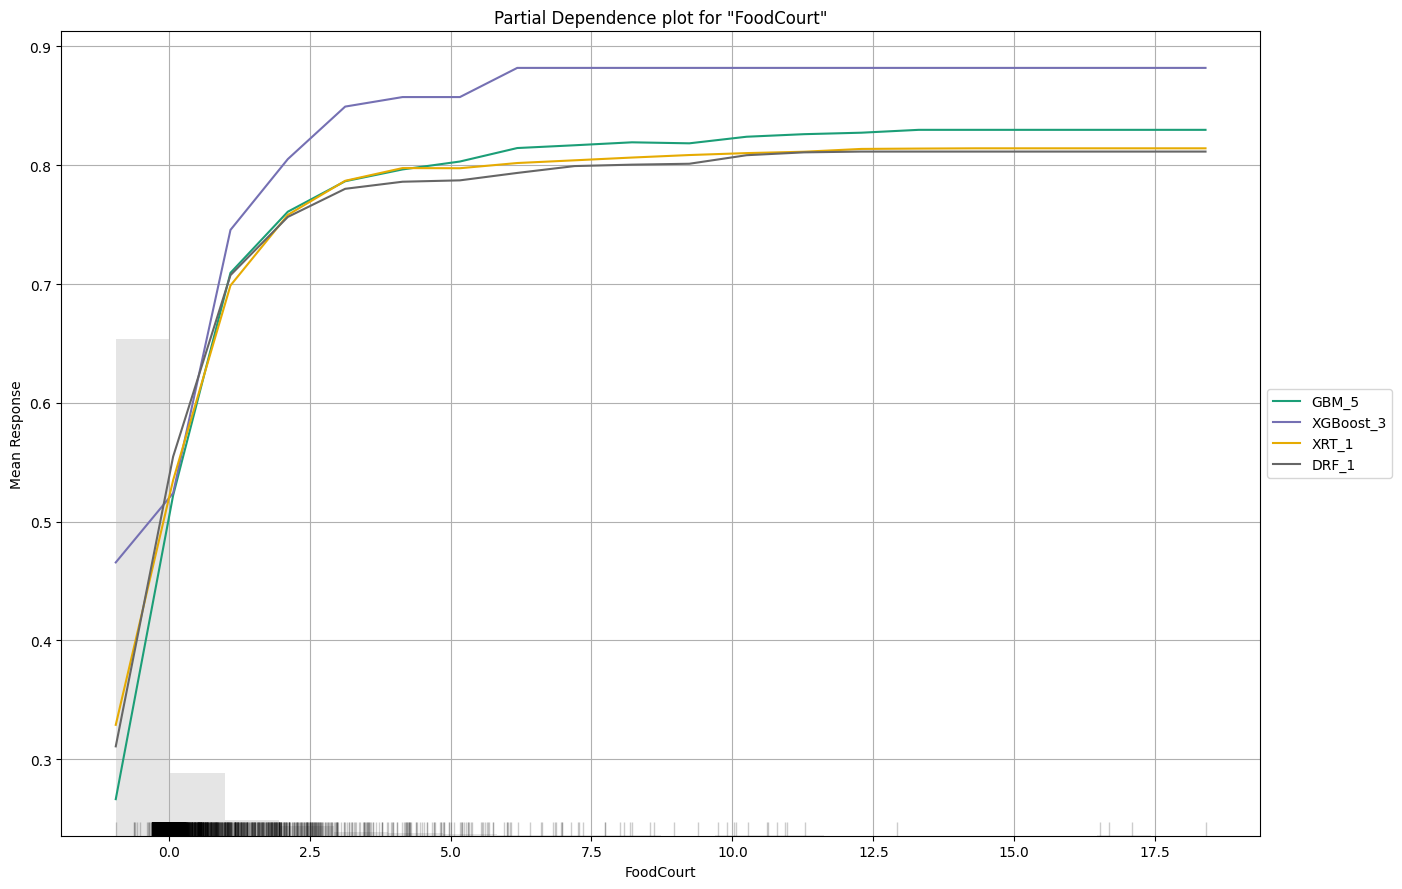

In [38]:
aml.explain(train_h2o, include_explanations=['varimp_heatmap', 'pdp', 'shap_summary',"confusion_matrix","model_correlation_heatmap"], \
           columns =['CryoSleep','HomePlanet','Transported','FoodCourt'])

In [39]:
# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb)

model_id                                             auc    logloss     aucpr    mean_per_class_error      rmse       mse
GBM_5_AutoML_1_20240321_70811                   0.890449   0.413372  0.899774                0.190211  0.364269  0.132692
GBM_2_AutoML_1_20240321_70811                   0.888894   0.415513  0.898927                0.196507  0.365667  0.133713
GBM_3_AutoML_1_20240321_70811                   0.888768   0.415726  0.898506                0.193531  0.366048  0.133991
GBM_4_AutoML_1_20240321_70811                   0.887425   0.418333  0.897712                0.193944  0.367488  0.135047
XGBoost_3_AutoML_1_20240321_70811               0.886966   0.41864   0.89624                 0.194397  0.367343  0.134941
GBM_1_AutoML_1_20240321_70811                   0.886261   0.420054  0.894662                0.195433  0.367591  0.135123
XRT_1_AutoML_1_20240321_70811                   0.884046   0.430693  0.892886                0.195582  0.369988  0.136891
XGBoost_grid_1_AutoML_1_

In [40]:
def best_model_matrix(model):
  best_model_stack = aml.get_best_model(algorithm=model)
  con = best_model_stack.confusion_matrix()
  con.table.show()
  df = pd.DataFrame(data=con.to_list(), columns=['Not Transported', 'Transported'])
  plt.figure(figsize=(8,8))
  sns.heatmap(df.corr(), annot = con.to_list(),fmt='.1f', cbar= False)
  plt.xlabel('True Values',color='red')
  plt.ylabel('Predicted Values', color ='red')
  plt.title(f'Confusion Matrix for {model}')
  plt.show()

,Not transported,Transported,Error,Rate
Not transported,2931.0,944.0,0.2436,(944.0/3875.0)
Transported,555.0,3390.0,0.1407,(555.0/3945.0)
Total,3486.0,4334.0,0.1917,(1499.0/7820.0)


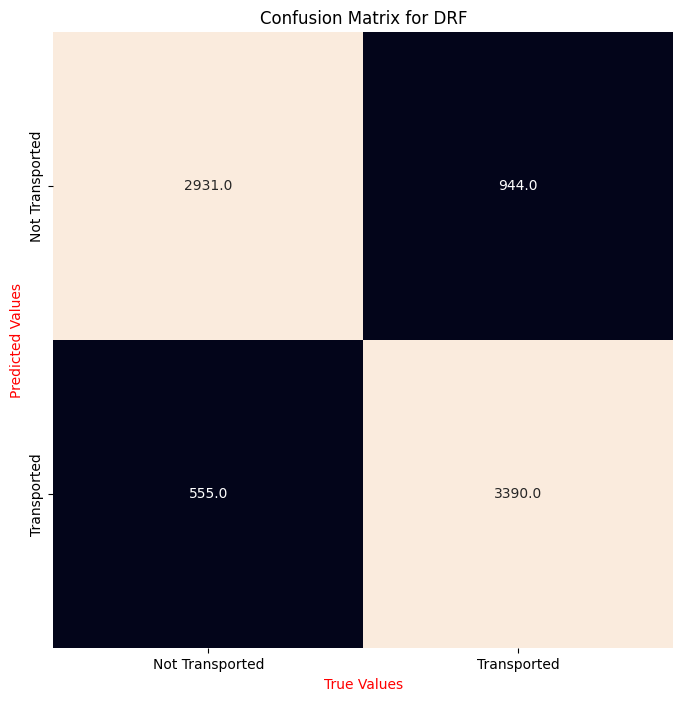

In [41]:
best_model_matrix('DRF')

,Not transported,Transported,Error,Rate
Not transported,3022.0,853.0,0.2201,(853.0/3875.0)
Transported,391.0,3554.0,0.0991,(391.0/3945.0)
Total,3413.0,4407.0,0.1591,(1244.0/7820.0)


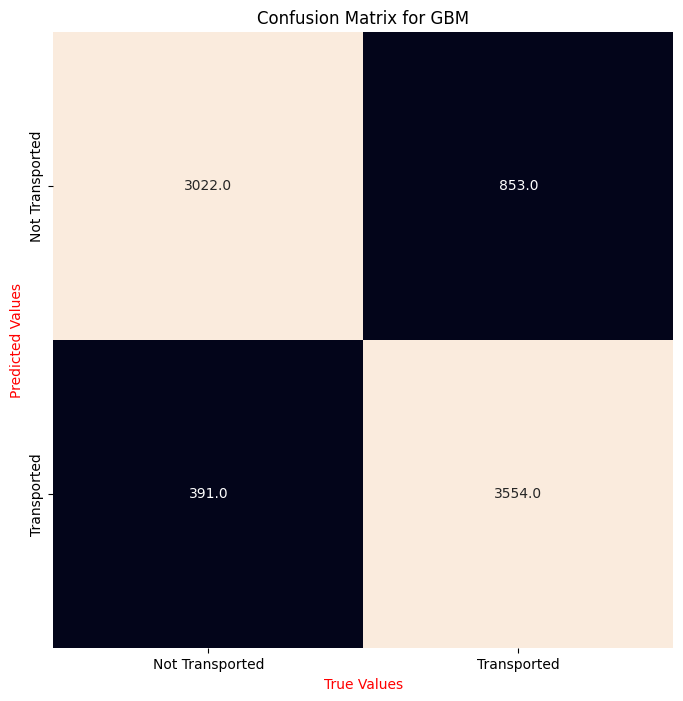

In [42]:
best_model_matrix('GBM')

,Not transported,Transported,Error,Rate
Not transported,2942.0,933.0,0.2408,(933.0/3875.0)
Transported,401.0,3544.0,0.1016,(401.0/3945.0)
Total,3343.0,4477.0,0.1706,(1334.0/7820.0)


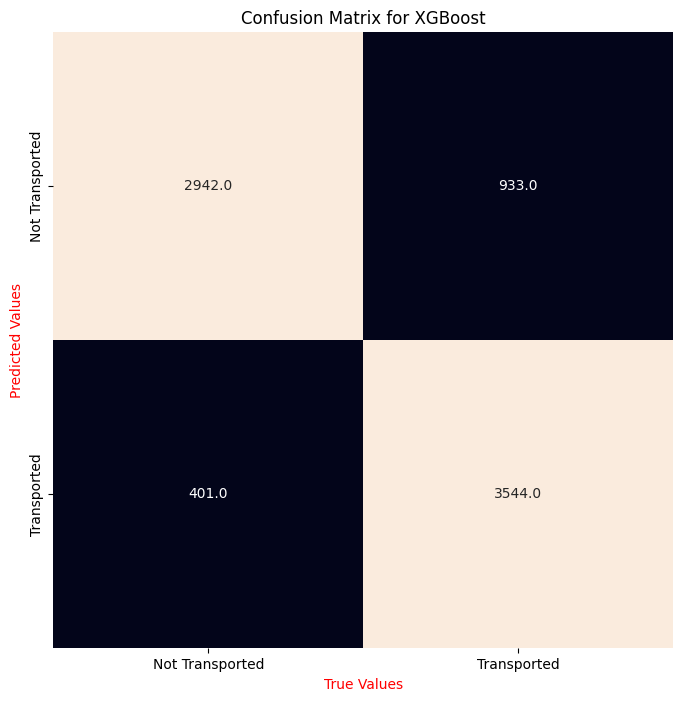

In [43]:
best_model_matrix('XGBoost')

In [44]:
best_model = aml.get_best_model()

In [45]:
best_model.algo

'gbm'

In [46]:
best_model.download_model('/content/sample_data/model_download')

'/content/sample_data/model_download/GBM_5_AutoML_1_20240321_70811'

In [47]:
y_pred = best_model.predict(test_h2o)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [48]:
y_pred.head(10)

predict,Not transported,Transported
Transported,0.372578,0.627422
Not transported,0.952449,0.0475513
Transported,0.0290906,0.970909
Transported,0.0577247,0.942275
Not transported,0.467872,0.532128
Transported,0.22368,0.77632
Transported,0.0302057,0.969794
Transported,0.0456997,0.9543
Transported,0.0285863,0.971414
Transported,0.347849,0.652151


In [49]:
predictions_df = y_pred.as_data_frame()

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [50]:
# Shut down the H2O cluster
h2o.shutdown()

H2O session _sid_a175 closed.


<ipython-input-50-58ff2730c230>:2: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


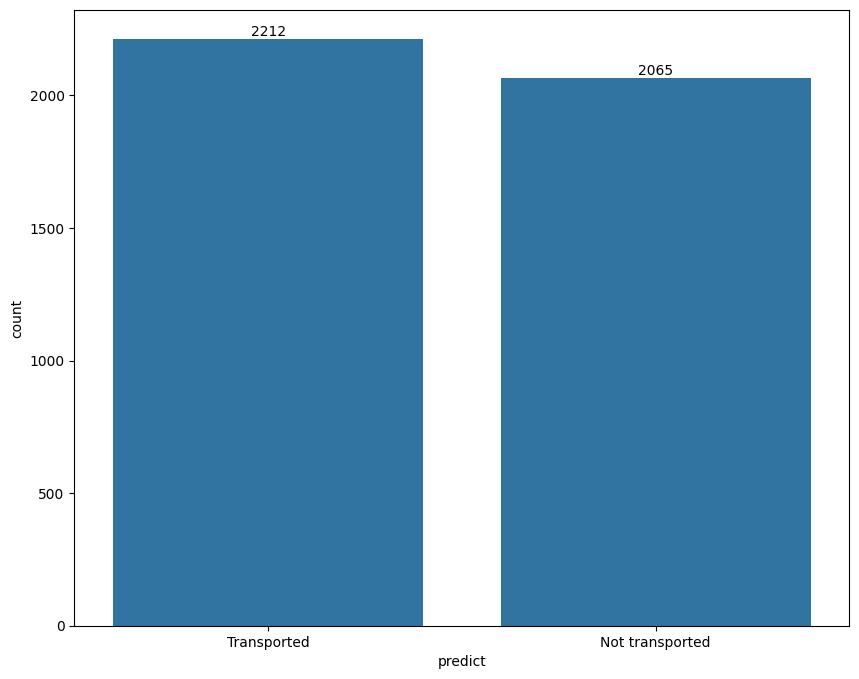

In [51]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=predictions_df, x='predict')
ax.bar_label(ax.containers[0])
plt.show()

In [52]:
from google.colab import files

# Preparing Kaggle submission file
submission = pd.DataFrame({'PassengerId': test_original['PassengerId'], 'Transported': predictions_df['predict']})

# Convert 0s and 1s to "False" and "True"
submission.replace({'Not transported': False, 'Transported': True}, inplace=True)

# Write the dataFrame to a .csv file
submission.to_csv('submission_Test.csv', index=False)

#Download the .csv file
files.download("submission_Test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
submission.describe()

,PassengerId,Transported
count,4277,4277
unique,4277,2
top,0013_01,True
freq,1,2212
